In [1]:
# 載入函式庫
import requests
from bs4 import BeautifulSoup
import time

In [2]:
max_page = 20 # 設定最多要爬到棒球版第幾頁的資料

In [3]:
### 取得棒球版最新一頁的索引 ###
res = requests.get('https://www.ptt.cc/bbs/Baseball/index.html')
soup = BeautifulSoup(res.text)

newest_index = 0
for i in soup.find_all(class_ = 'btn wide'):
    index = i.get('href').split('index')[-1].split('.html')[0]
    if index != '':
        index = int(index)
        if index > newest_index:
            newest_index = index
newest_index += 1

print(newest_index)

10055


In [4]:
### 爬取棒球版前n頁所有的標題 ###
title_list = []
for i in range(max_page):
    index = newest_index - i
    res = requests.get('https://www.ptt.cc/bbs/Baseball/index' + str(index) + '.html')
    soup = BeautifulSoup(res.text)
    for target_content in soup.find_all(class_ = "title"):
        title_list.append(target_content.getText().split(']')[-1].strip()) # 要把標題分類去掉
    #time.sleep(1) # 避免防爬蟲的機制
    
# 查看前二十個標題
title_list[:20]

['軟銀隊 甲斐野央透露手肘傷勢接近復原',
 '斗六可以打，洲際不能打？',
 '中職／這才是死忠象迷！美國教授訂製兄弟戰袍終於到貨',
 '味全有喇叭組？',
 '你各位覺得中職的最大賣點是？',
 '上半季延賽至今已11場\u3000桃猿7場最多',
 '歷史上的今天-鍾承祐斷棒完全打擊',
 '桃園球場24日降雨機率0！達尼爾開箱對決卡本特',
 '明日先發',
 '你各位覺得中職的最大賣點是？',
 '被羅力數據震懾！ 美媒：小聯盟無名小卒',
 '(本文已被刪除) <chihchingho>',
 '基宏去年為什麼上場那麼少',
 '金鶯大動作人事異動 砍37名小聯盟球員',
 '今日張進德',
 '史上最衝的領隊 「郭大砲」豪氣擺出阿Q',
 '既然0.57X就太彈 怎麼上限還訂0.580??',
 '板規/即時資訊',
 '2020棒球賽事轉播節目表',
 '2020中華職棒31年 第三版賽程表']

In [5]:
#! pip install jieba

In [15]:
import jieba

# jieba.set_dictionary('dict.txt.big')
wordlist = jieba.cut(' '.join(title_list))
words = ','.join(wordlist)

In [7]:
#! pip install wordcloud

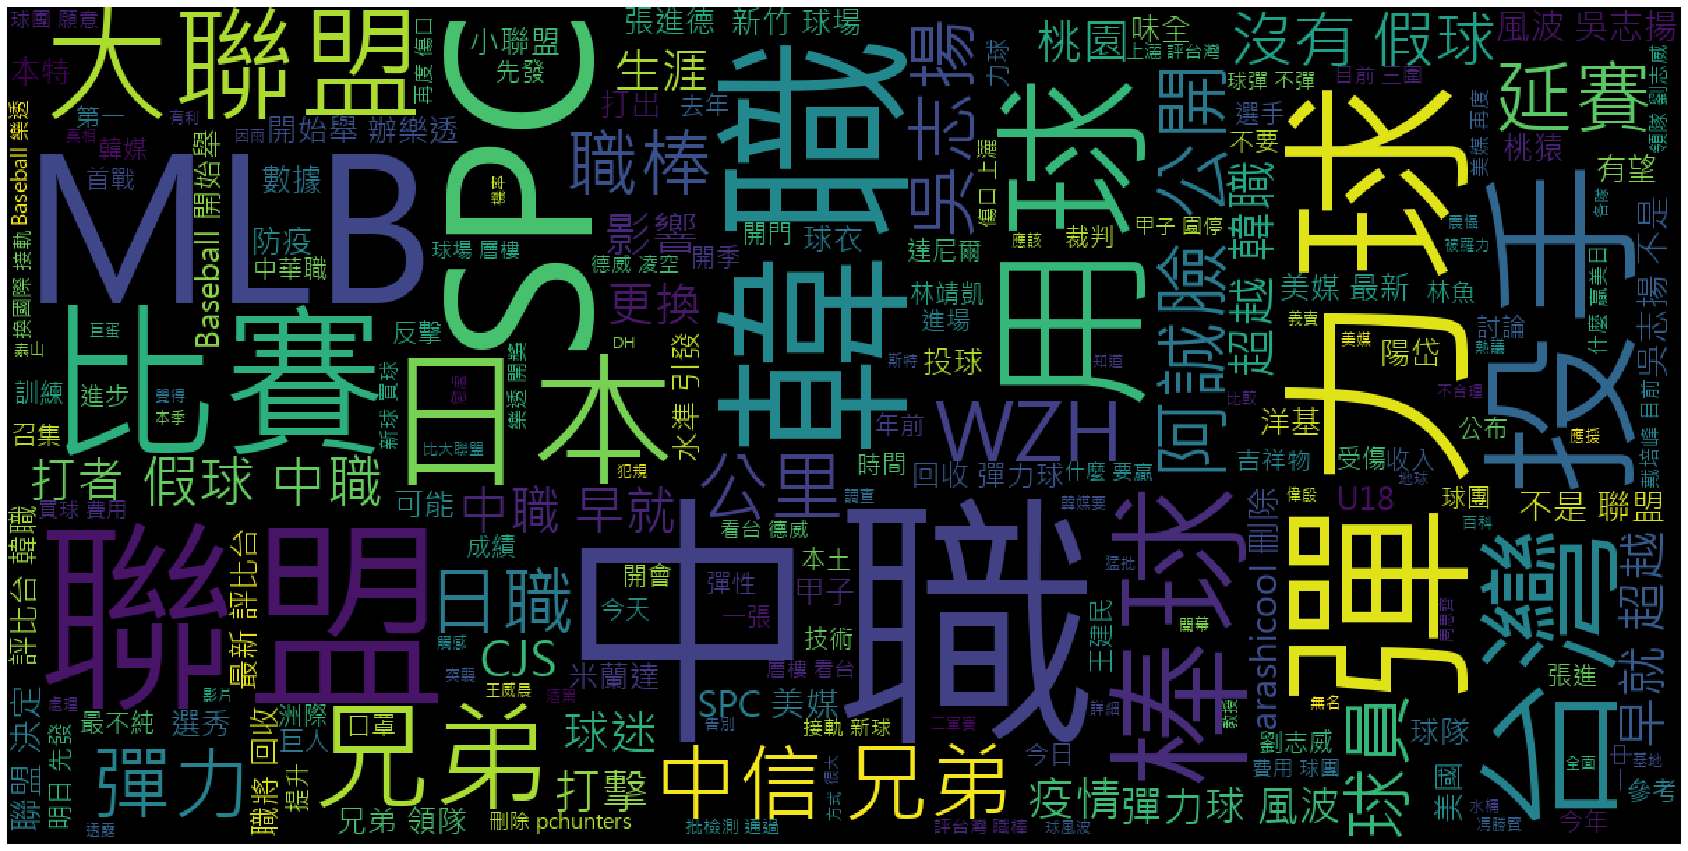

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

plt.rcParams['font.sans-serif'] = ['simhei'] # 可以顯示中文字

# 讀取停用字
stopwords = []
with open('stopwords.txt', 'r', encoding='UTF-8') as file:
    for data in file.readlines():
        data = data.strip()
        stopwords.append(data)
stopwords += ['是不是', '不能', '刪除', '本文', '無法', '如果', '沒有']
     
my_wordcloud = WordCloud(
    width=1200, height=600, max_font_size=200, 
    max_words=200, font_path = r'msjh.ttc', stopwords = stopwords).generate(words)

# 視覺化呈現
plt.figure(figsize=(30,20))
plt.imshow(my_wordcloud)
plt.axis("off")
plt.show()

目前沒有針對一些棒球相關的專有名詞(例如球員和球隊名稱)建立字典，不然結果應該會更有可看性。